<a target="_blank" href="https://colab.research.google.com/github/paulotguerra/QXD0178/blob/main/03.E0-Exercicio-Agrupamento-de-Dados.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## QXD0178 - Mineração de Dados
# Agrupamento de dados

**Professor:** Paulo de Tarso Guerra Oliveira ([paulodetarso@ufc.br](mailto:paulodetarso@ufc.br))


# Lista de Exercícios: Agrupamento de dados

Nesta lista de exercícios, você explorará a aplicação de métodos de aprendizado de máquina para realizar tarefas de agrupamento de dados (*clustering*). Você usará a base de dados [Iris plants dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset) e avaliará algoritmos de agrupamento para comparar sua efetividade. O objetivo é entender como diferentes métodos de aprendizado de máquina se comportam em relação à tarefa de agrupamento de dados.

Você deverá utilizar os algoritmos [K-Means](https://scikit-learn.org/stable/modules/clustering.html#k-means), [Gaussian Mixture](https://scikit-learn.org/stable/modules/mixture.html#mixture) e [DBSCAN](https://scikit-learn.org/stable/modules/clustering.html#dbscan) e comparar o resultado produzido por cada modelo para o seguinte conjunto de hiperparâmtros, quando aplicável aquele modelo.

* K-means: 
    * Centróides (`n_clusters`): 2, 3, e 6.    
* Gaussian Mixture
    * Componentes (`n_components`): 2, 3, e 6
    * Covariância (`covariance_type`): `'full'`, `'diag'` e `'spherical'`
* DBSCAN:
    * Distância (`eps`): 0.5, 1 e 1.5.
    * Mínimo de amostras (`min_samples`): 5, 10 e 25.


Como parte do objetivo praticar visualizações de dados, para cada experimento, você deve replicar a seguinte visualização usando apenas o [matplotlib](https://matplotlib.org/stable/users/index).

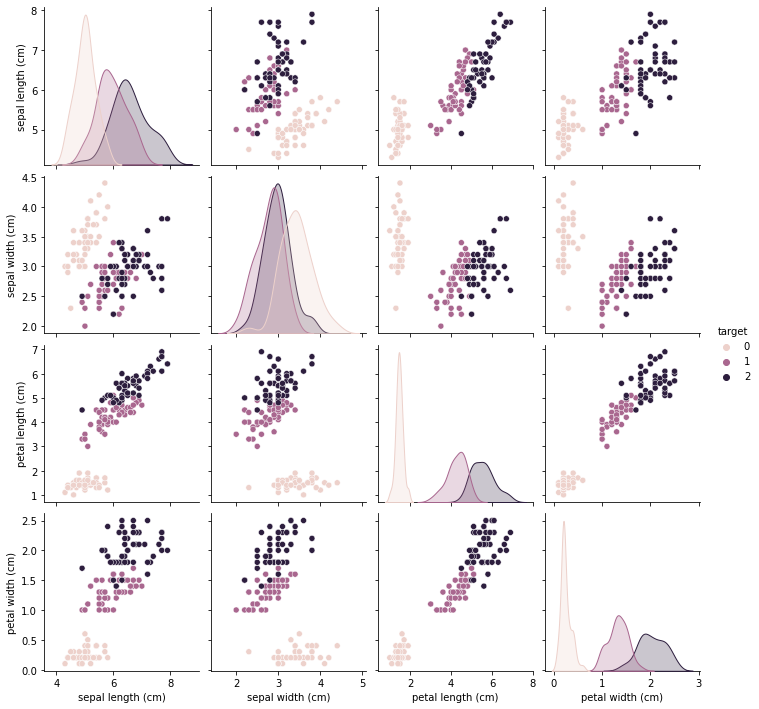

Você deve executar o experimento para cada par *features*, colorindo de acordo com o resultado fornecido pelo modelo de clusterização. Nos elementos da diagonal, você deve executar o cálculo de densidade dos elementos do conjunto usando `KDE` (`bandwidth=1.0, kernel='gaussian'`), também de acordo com a saída do modelo. Compare os experimentos entre si e com o que deveria ser a saída correta dos dados, segundo os rótulos originais do *dataset*. 

Documente todas as etapas em um arquivo Jupyter Notebook (`.ipynb`) que inclua as análises, o código e as justificativas. Lembre-se de que é fundamental justificar todas as decisões tomadas ao longo do processo e documentar as análises de forma clara e concisa. Este trabalho tem como objetivo proporcionar uma compreensão prática da seleção e avaliação de algoritmos de agrupamento em cenários de aprendizado não-supervisionado.

Envie seu Jupyter Notebook até a data de entrega especificada nesta tarefa.

## Solução


### Carga do conjunto de dados

In [7]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Nota sobre o matplotlib
Ao verificar a descrição da atividade, notei o ponto em que pedia para se utilizar apenas o matplot lib. Tentei realizar o exercício só com essa biblioteca e percebi alguns problemas, que giravam em torno principalmente da visualização não sair como o exemplo descrito no ínicio da atividade, seja pelo fato de não ter achado a paleta de cores apresentada, os gráficos de dispersão apresentarem cores diferentes das que estavam nos gráficos de densidade e problemas visuais ao colocar as métricas (sepal width, sepal lenght) nos gráficos. Na dúvida sobre o que priorizar, se a utilização somente do matplot lib ou na visualização de acordo com o exemplo apresentado, me passou pela cabeça se a utilização do seaborn seria válida, uma vez que é uma biblioteca mais recente e simples de ser utilizada e por si só implementar o matplotlib. Devido a isso, e ao processo de decisão e otimização das atividades que cabe a nós, cientistas de dados, implementarmos, acabei utilizando no fim das contas o seaborn junto com o matplotlib, o que tornou o código muito mais enxuto, a visualização vindo de acordo com o esperado e a análise dos resultados poder ser feita de forma mais objetiva, já que as cores estavam consistentes. 

### K-means

#### n_clusters = 2

C:\Users\as390\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\as390\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1.0`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(x=vector, **plot_kwargs)
C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

Support for alternate k

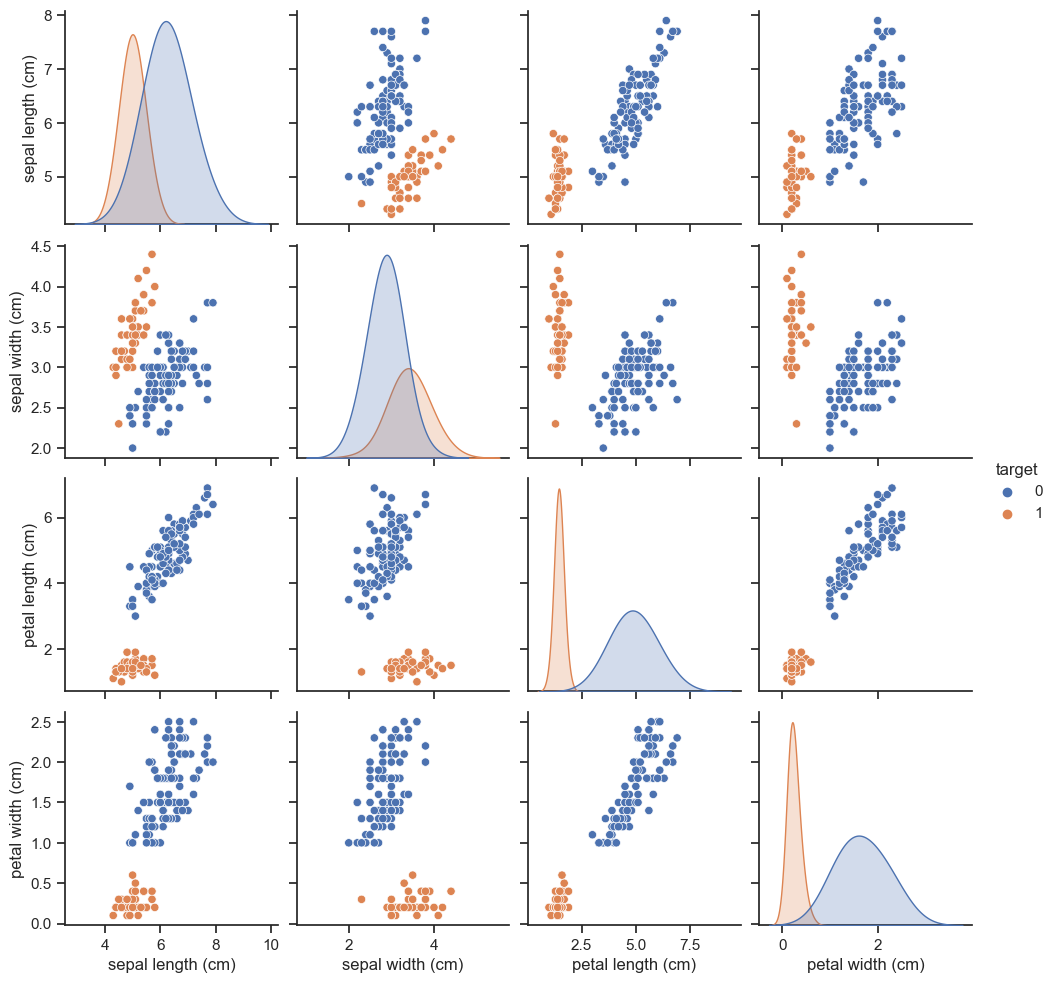

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KernelDensity
import numpy as np

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=2)
df['target'] = kmeans.fit_predict(X_scaled)

sns.set(style="ticks")
sns.pairplot(df, hue="target", diag_kws={'bw': 1.0, 'kernel': 'gaussian'})
plt.show()


#### n_clusters = 3

C:\Users\as390\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\as390\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1.0`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(x=vector, **plot_kwargs)
C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

Support for alternate k

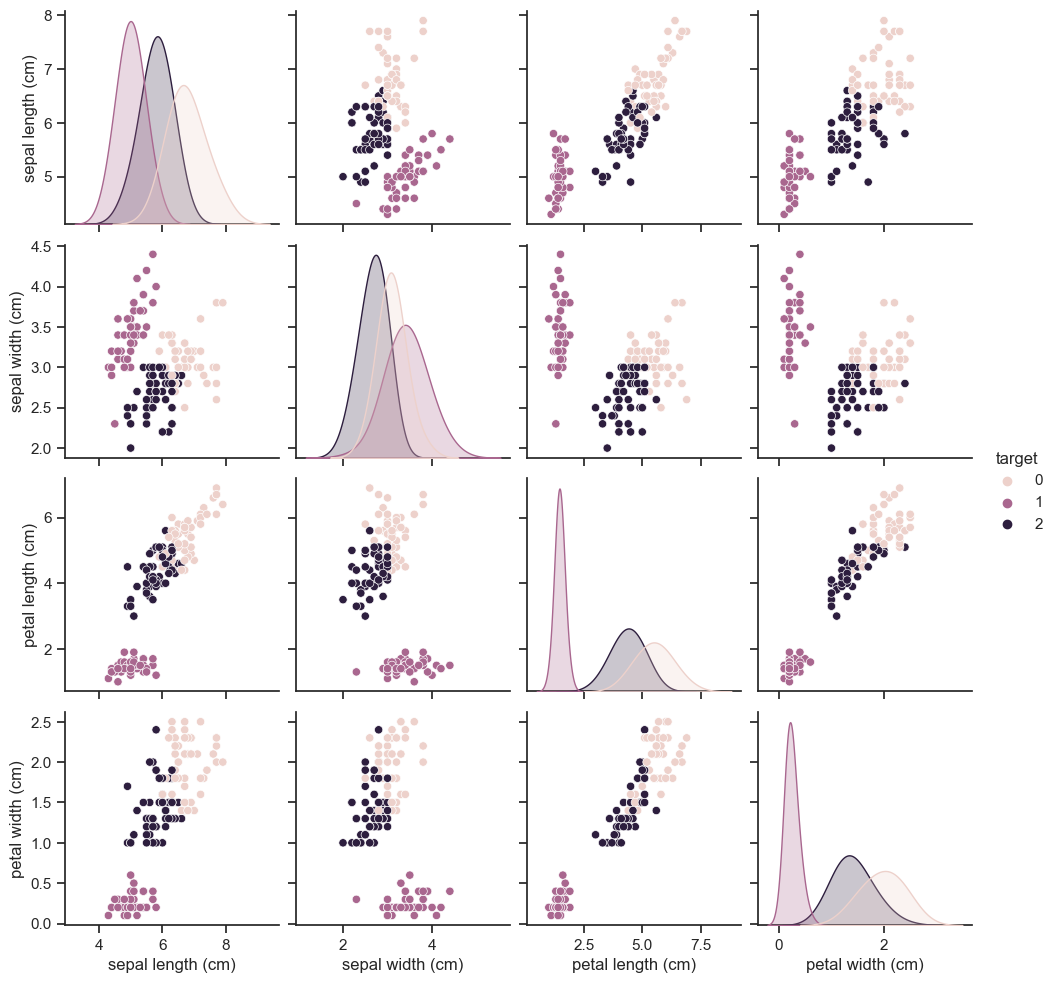

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KernelDensity
import numpy as np

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=3)
df['target'] = kmeans.fit_predict(X_scaled)

sns.set(style="ticks")
sns.pairplot(df, hue="target", diag_kws={'bw': 1.0, 'kernel': 'gaussian'})
plt.show()

#### n_clusters = 6

C:\Users\as390\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\as390\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1.0`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(x=vector, **plot_kwargs)
C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

Support for alternate k

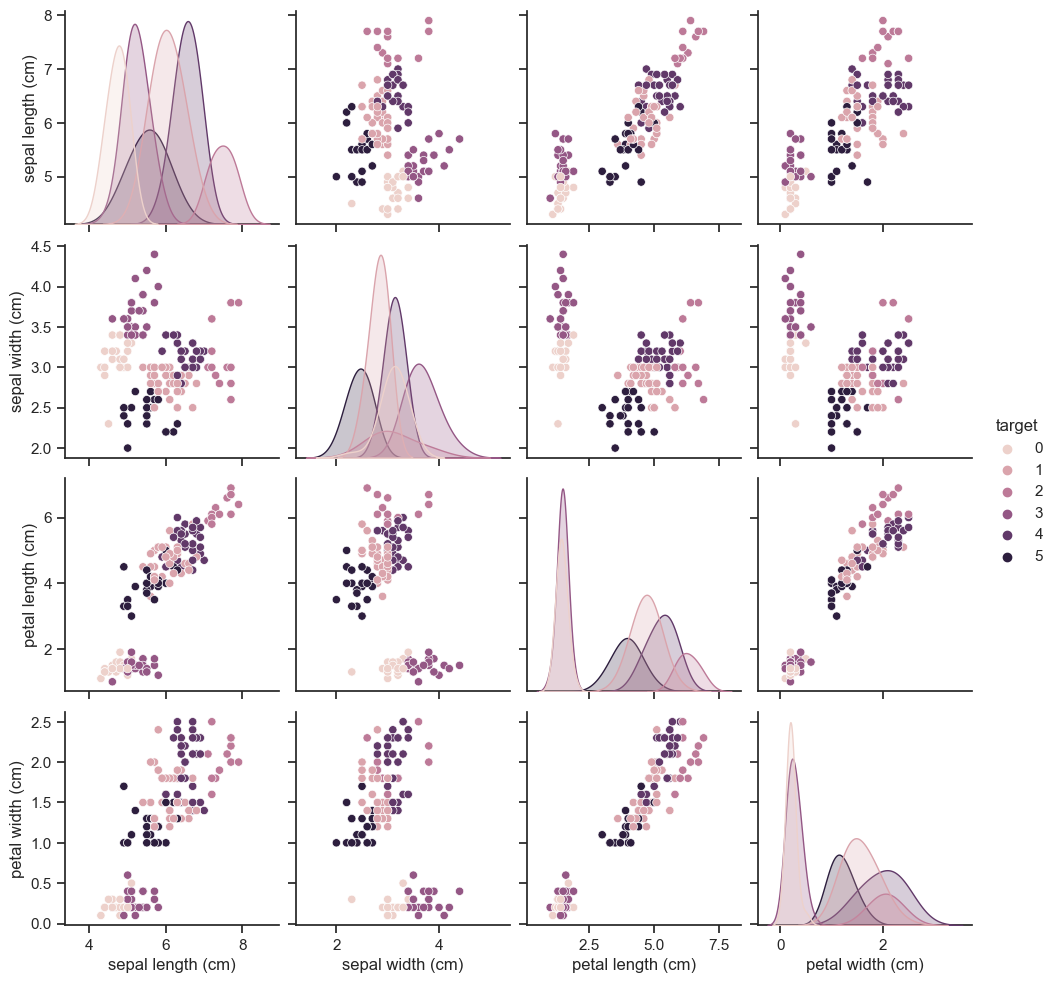

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KernelDensity
import numpy as np

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=6)
df['target'] = kmeans.fit_predict(X_scaled)

sns.set(style="ticks")
sns.pairplot(df, hue="target", diag_kws={'bw': 1.0, 'kernel': 'gaussian'})
plt.show()

### Gaussian

#### n_components = 2 e covariance_type = full

C:\Users\as390\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1.0`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(x=vector, **plot_kwargs)
C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter 

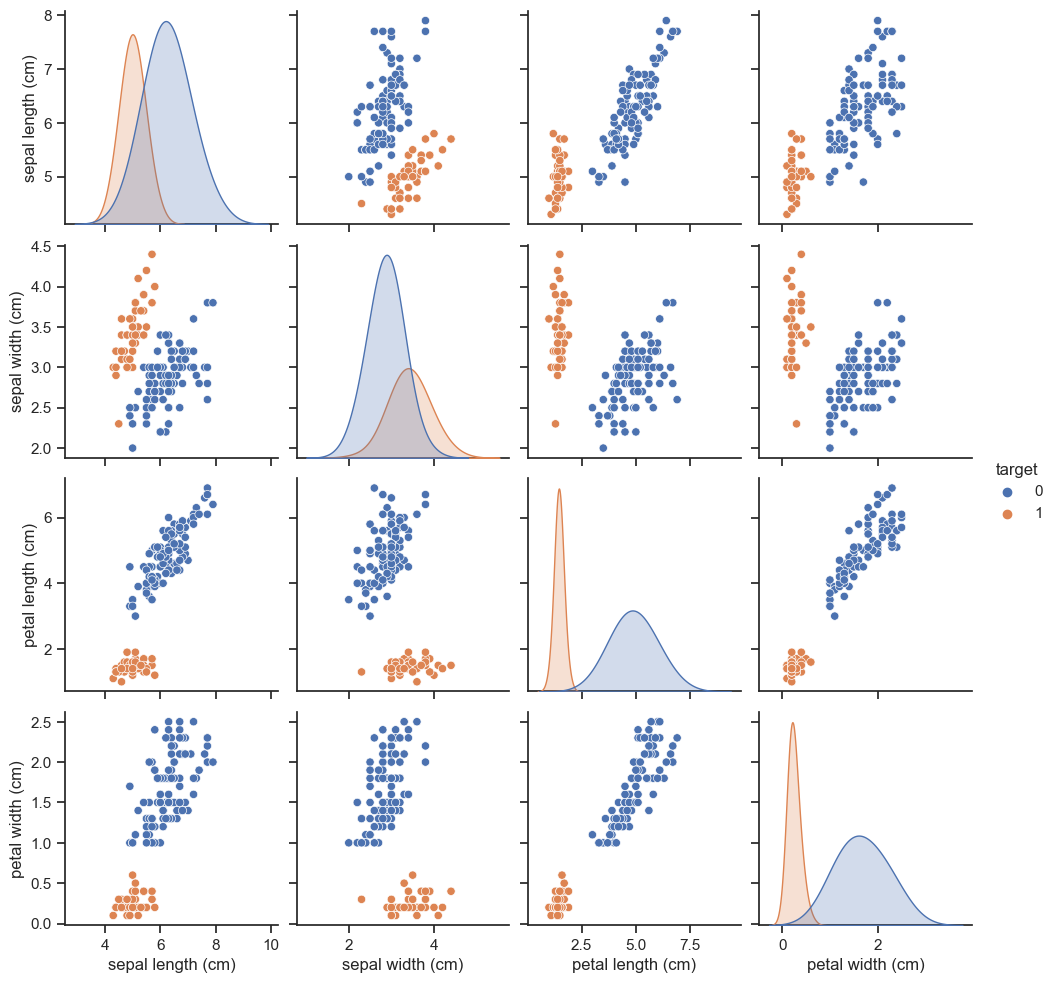

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
df['target'] = gmm.fit_predict(X_scaled)

sns.set(style="ticks")
sns.pairplot(df, hue="target", diag_kws={'bw': 1.0, 'kernel': 'gaussian'})
plt.show()

#### n_components = 3 e covariance_type = diag

C:\Users\as390\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1.0`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(x=vector, **plot_kwargs)
C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter 

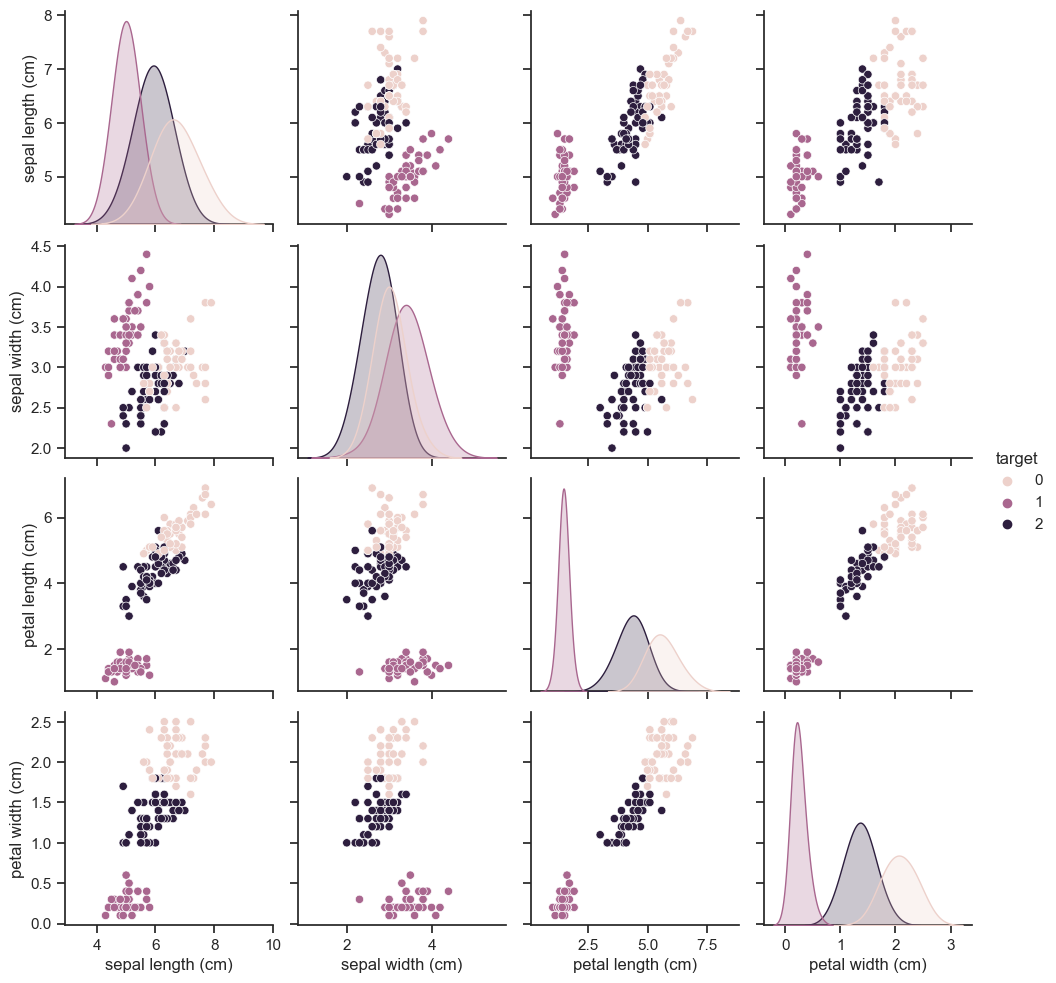

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

gmm = GaussianMixture(n_components=3, covariance_type='diag', random_state=42)
df['target'] = gmm.fit_predict(X_scaled)

sns.set(style="ticks")
sns.pairplot(df, hue="target", diag_kws={'bw': 1.0, 'kernel': 'gaussian'})
plt.show()

#### n_components =  6 e covariance_type = spherical

C:\Users\as390\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1.0`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(x=vector, **plot_kwargs)
C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter 

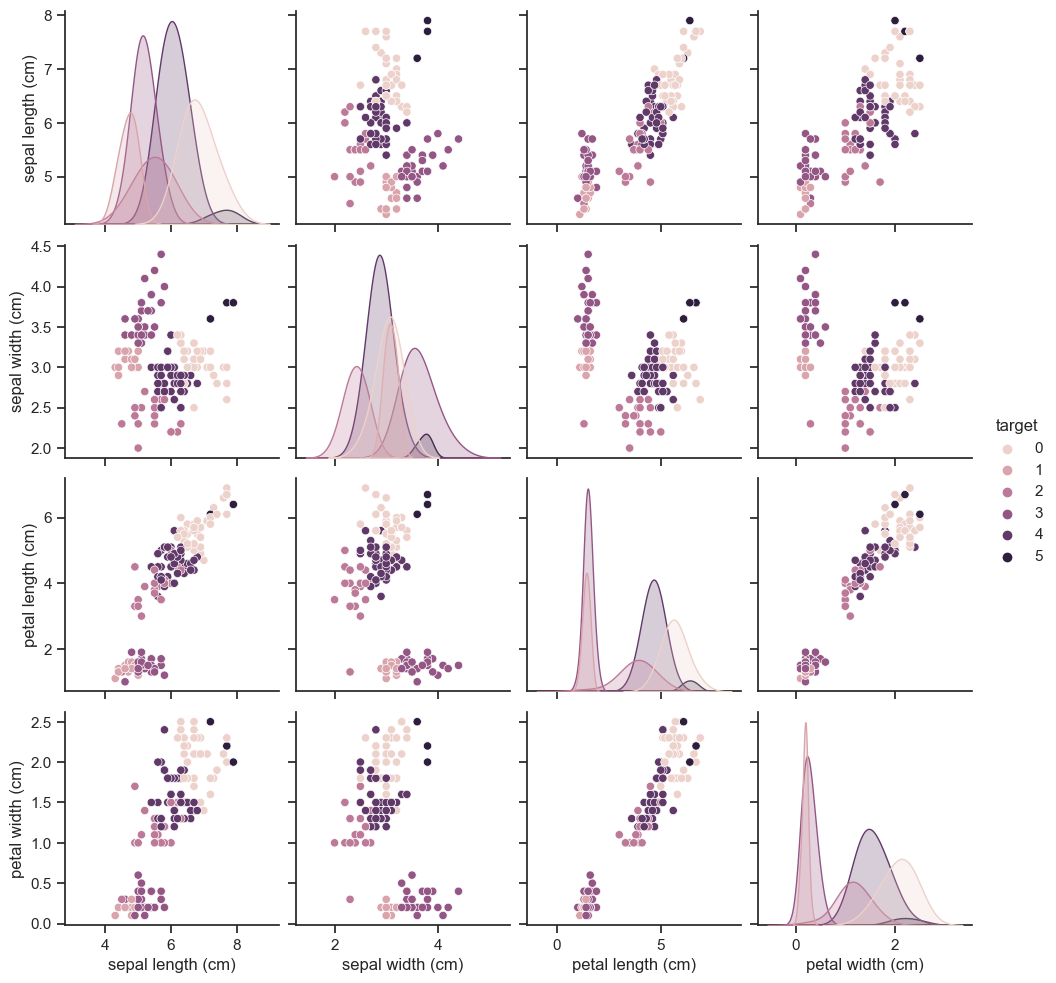

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

gmm = GaussianMixture(n_components=6, covariance_type='spherical', random_state=42)
df['target'] = gmm.fit_predict(X_scaled)

sns.set(style="ticks")
sns.pairplot(df, hue="target", diag_kws={'bw': 1.0, 'kernel': 'gaussian'})
plt.show()

### DBSCAN

#### eps = 0.5 e min_samples = 5

C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1.0`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(x=vector, **plot_kwargs)
C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1.0`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(x=vector, **plot_kwargs)
C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarnin

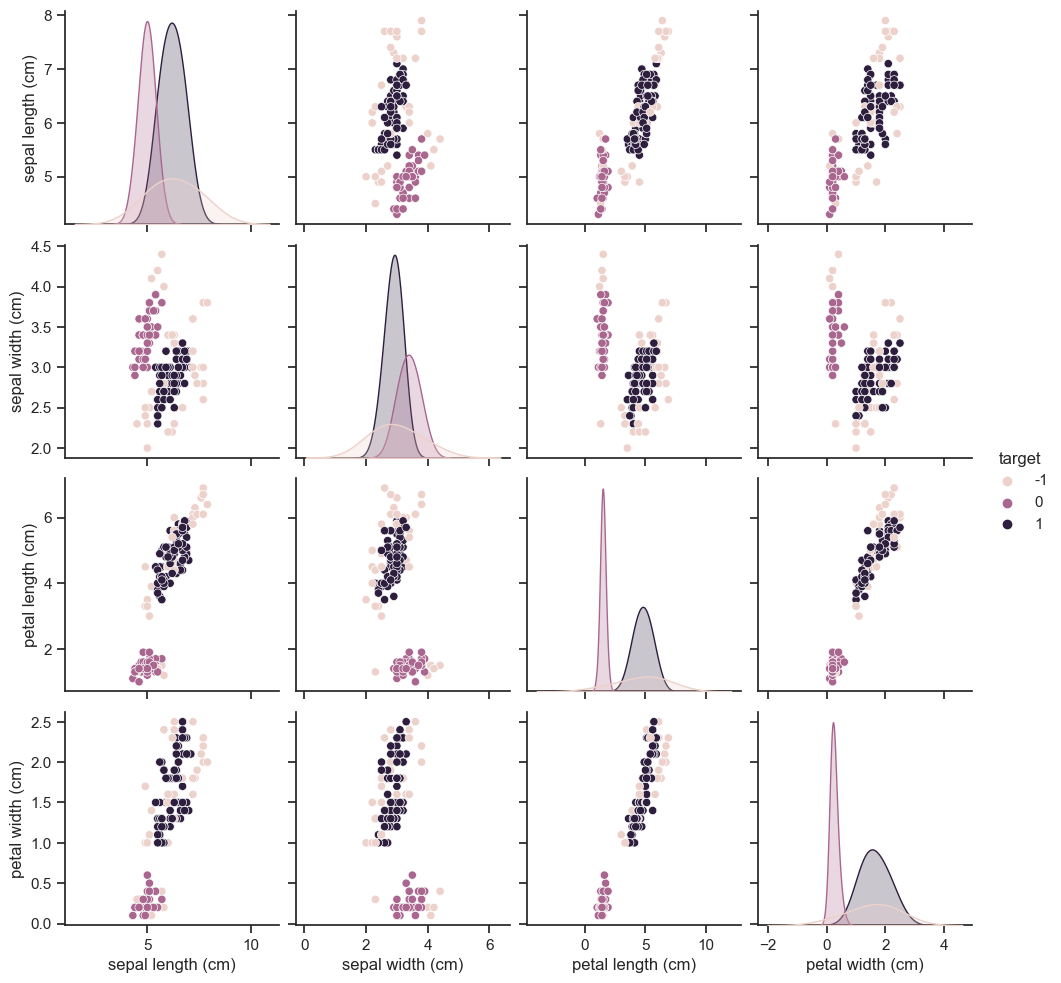

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

dbscan = DBSCAN(eps=0.5, min_samples=5)
df['target'] = dbscan.fit_predict(X_scaled)

sns.set(style="ticks")
sns.pairplot(df, hue="target", diag_kws={'bw': 1.0, 'kernel': 'gaussian'})
plt.show()

#### eps = 1 e min_samples = 10

C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1.0`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(x=vector, **plot_kwargs)
C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1.0`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(x=vector, **plot_kwargs)
C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarnin

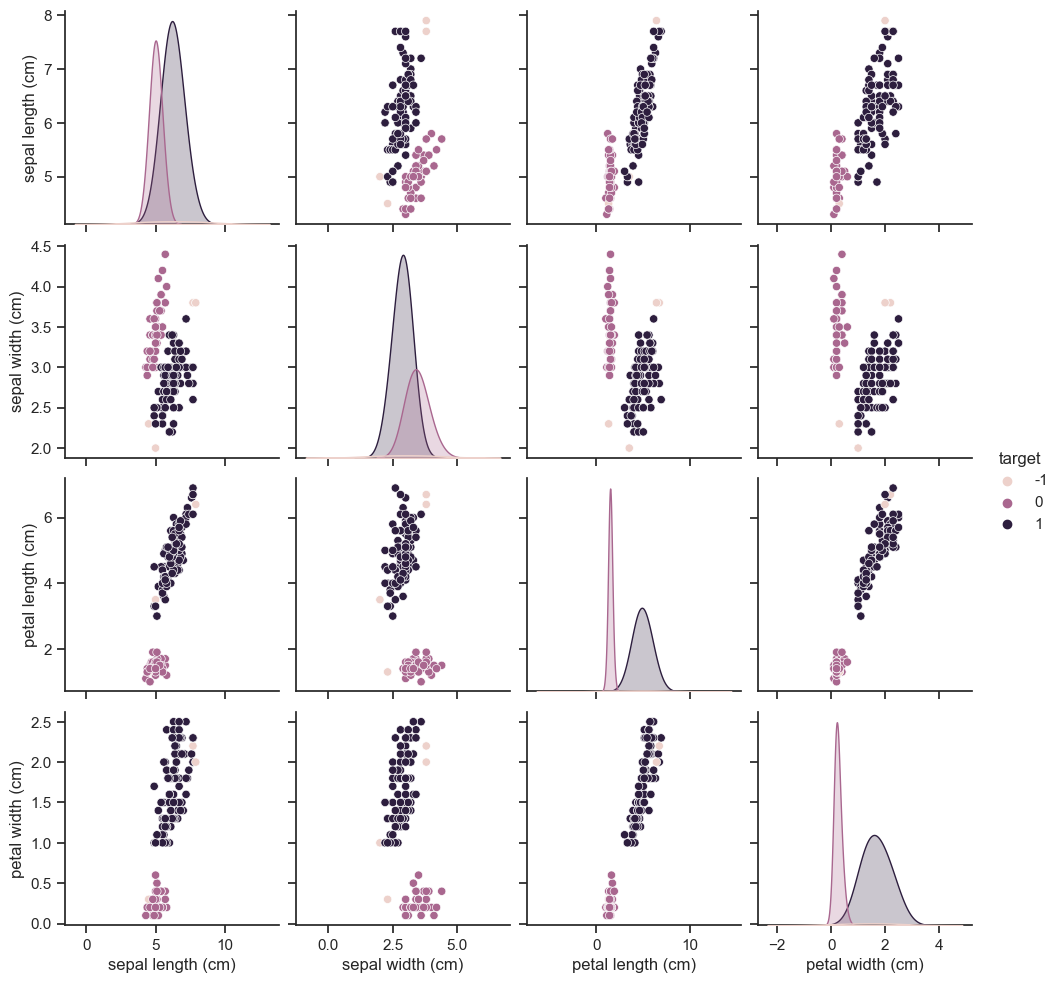

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

dbscan = DBSCAN(eps=1.0, min_samples=10)
df['target'] = dbscan.fit_predict(X_scaled)

sns.set(style="ticks")
sns.pairplot(df, hue="target", diag_kws={'bw': 1.0, 'kernel': 'gaussian'})
plt.show()

#### eps = 1.5 e min_samples = 25

C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1.0`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(x=vector, **plot_kwargs)
C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1.0`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(x=vector, **plot_kwargs)
C:\Users\as390\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarnin

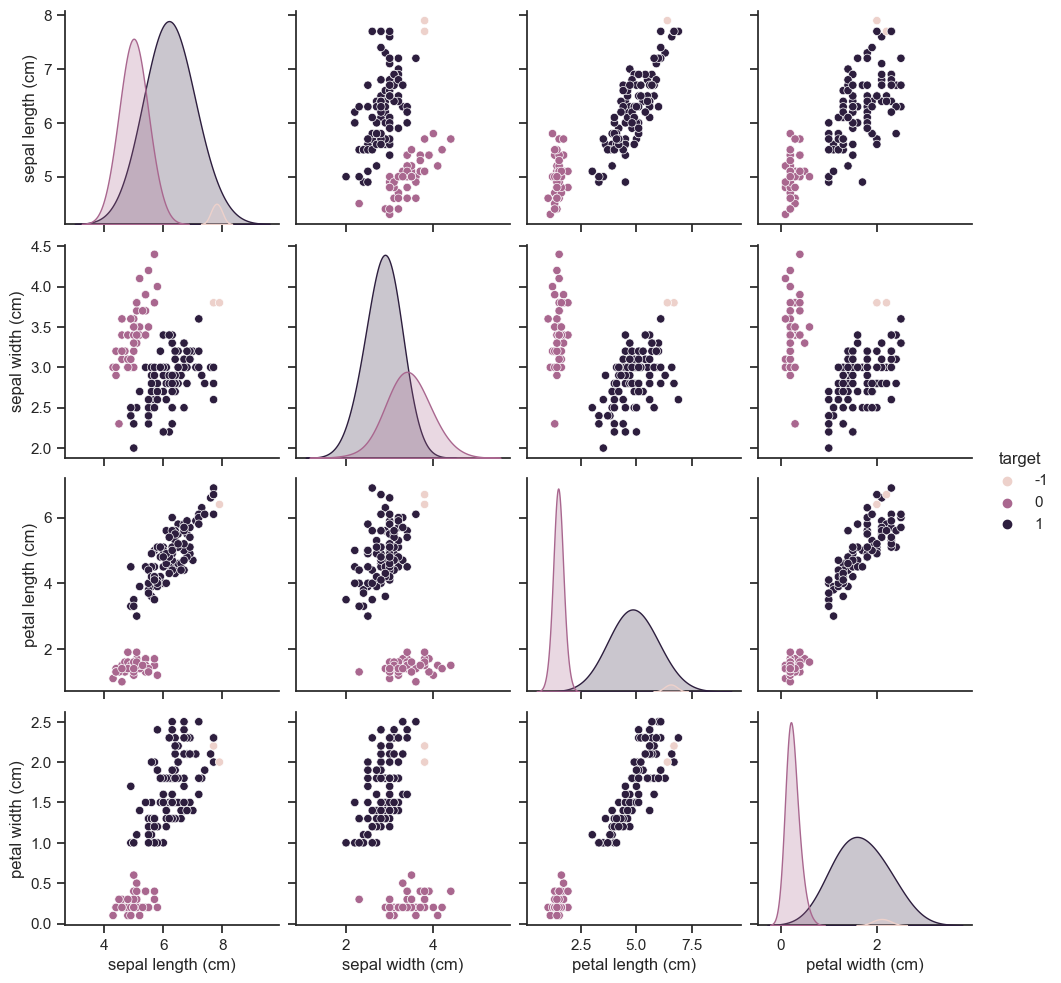

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

dbscan = DBSCAN(eps=1.5, min_samples=25)
df['target'] = dbscan.fit_predict(X_scaled)

sns.set(style="ticks")
sns.pairplot(df, hue="target", diag_kws={'bw': 1.0, 'kernel': 'gaussian'})
plt.show()

### Análise dos resultados

### K-means
Como podemos observar, o k-means teve resultados bem diferentes conforme foram aplicados diferentes valores para o parâmetro n_components. Iniciamente, enquanto trabalhando apenas com 2 clusters, podemos ver que ele conseguiu agrupar de maneira clara e consistente os dados e, de forma geral, considerando que temos apenas 2 grupos enquanto o dataset original apresenta 3, obtivemos resultados muito semelhantes, ao lembrar que ele considerou 2 grupos do original e um só na aplicação proposta neste exercício. Tal comportamento pode ser explicado pela sua característica de funcionamento baseado em centróides.
Ao aplicarmos 3 clusters, observamos que o algoritmo separou os dados em grupos consideravelmente consistentes, apresentando uma boa quantidade de pontos do mesmo grupo juntos entre si, o que mais uma vez pode ser explicado pelo funcionamento do algoritmo. No entanto, observamos que, no dataset original, essa distribuição, em alguns casos, não era tão exata assim, com alguns pontos de um mesmo grupo sendo colocados entre muitos de outro grupo. Nesses casos, podemos observar que o algoritmo performou de forma diferente do original, embora separando os dados em grupos concisos.
Na aplicação de 6 clusters, o k-means acabou ser perdendo um pouco e até gerando muitos grupos que se encontravam e que possuiam dados intricados entre si. Muito embora fique até difícil a visualização considerando a grande quantidade de grupos, ao oservamos os gráficos de densidade, podemos ver que o algoritmo realmente se perdeu e não distribuiu os grupos de forma semelhante ao dataset original.

### Gaussian
Relativo ao Gaussian, ao aplicarmos os parametros n_components = 2 e covariance_type = full, percebemos um desempenho muito semelhante ao k-means com 2 clusters, os grupos foram divididos de forma consiste e, considerando a existência somente desses 2 grupos, enquanto tendo 3 no dataset original, podemos considerar que o modelo teve uma boa performance.
Aplicnando os parâmetros n_components = 3 e covariance_type = diag, obtivemos uma distribuição com um grau de consistência mais preciso que o k-means obteve em sua segunda execução, com grupos tendo seus pontos mais próximos entre si e chegando mais próximos do grau do dataset original. Muito embora a distruibuição não tenha sido perfeita, especialmente ao observamos o grau de densidade, vi uma aproximação maior desse modelo em relação ao k-means.
Com a aplicação dos paramêtros n_components =  6 e covariance_type = spherical, podemos obeservar uma consistência maior dos grupos criados em relação ao último desempenho do k-means. Embora, ao ser aplicado tantos grupos, a visualização fique comprometida e tenha muitos pontos de grupos diferentes próximos uns dos outros, é possível distinguir áreas de distribuição dos pontos de um mesmo grupo mais bem definidas do que no k-means, mostrando que esse modelo performou, de forma geral, melhor que o anterior.

### DBSCAN
Com os parâmetros eps = 0.5 e min_samples = 5 o db scan performou de forma muito mal e considerou muitos dados como ruído. Basta uma olhada rápida nos gráficos de densidade do dataset original e desse para perceber que ele teve o desempenho mais baixo com base nos parâmetros fornecidos.
Quando os parâmetros foram mudados para os valores eps = 1 e min_samples = 10, tivemos uma melhora considerável na distruibuição dos grupos, tendo uma presença baixa de ruído e os pontos juntos em áreas bem definidas. Mas é importante observar que a divisão foi feita apenas em 2 grupos gerais e o desempenho pode ser comparado aos demais modelos nas mesmas circunstâncias.
Com os parâmetros eps = 1.5 e min_samples = 25 aplicados, mais uma vez o desempenho mudou e tivemos menos presença de ruido, mas o modelo observou novamente somente 2 clusters, então ele sofreu de vantagem quanto a outros algorimos nesse caso. No contexto da densidade dos elementos, nesses últimos parâmetros, embora seu desempenho não tenha ficado tão distante do original, ele também teve desempenho não muito diferente dos demais modelos.

### Conclusão
Determinar um único modelo para a resolução de um problema de análise como a escolha mais adequada é díficil. Diferentes algoritmos performam de forma diferente, em diferentes problemas, com diferentes parâmetros aplicados. No contexto dos algoritmos utilizados aqui e nos seus desempenhos, tivemos cada um perfomando com base nas suas características e nos parâmetros fornecidos, alguns tendo resultados semelhantes ao serem aplicados determinados parâmetros. Tendo como foco o desempenho chegando mais próximo do dataframe original, eu utilizaria o Gaussian nesse caso, especificamente aplicando os parâmetros n_components = 3 e covariance_type = diag, ele foi o que chegou mais perto da distribuição de dados original e em um modelo semelhante, com a visualização sendo de forma relativamente mais organizada que os outros. No entanto, é importante afirmar que a escolha de um algoritmo e de seus parâmetros escolhidos pode variar conforme um grande número de fatores, é necessário um estudo cuidadoso e uma análise minunciosa para saber qual se adequar melhor ao objetivo do seu negócio ou estudo. Tenho noção de que, assim como muitas outras áreas da programação, ter uma única ferramenta como bala de prata para todos os casos é basicamente impossível e potencialmente perigoso para os que tem esse pensamento e usam dessas crenças sem pestanejar.